In [ ]:
'''Perform partitioning, hierarchical, and density-based clustering algorithms on a
downloaded dataset and evaluate the cluster quality by changing the algorithm's
parameters'''

In [ ]:
#partining uisng k-mean

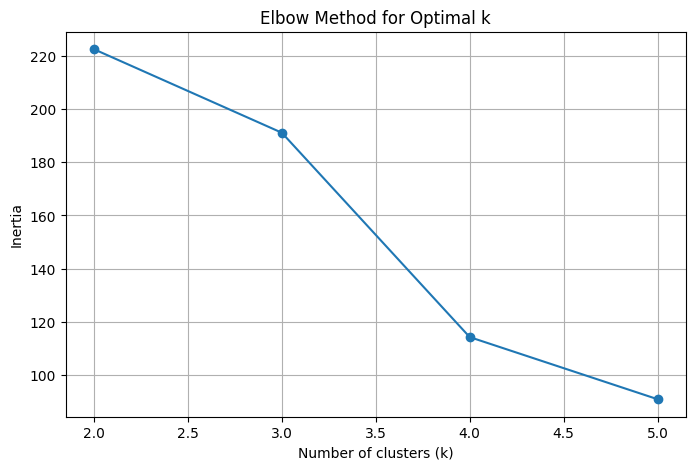

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering with different number of clusters
k_values = [2, 3, 4, 5]
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph for K-means
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
#hierarchical

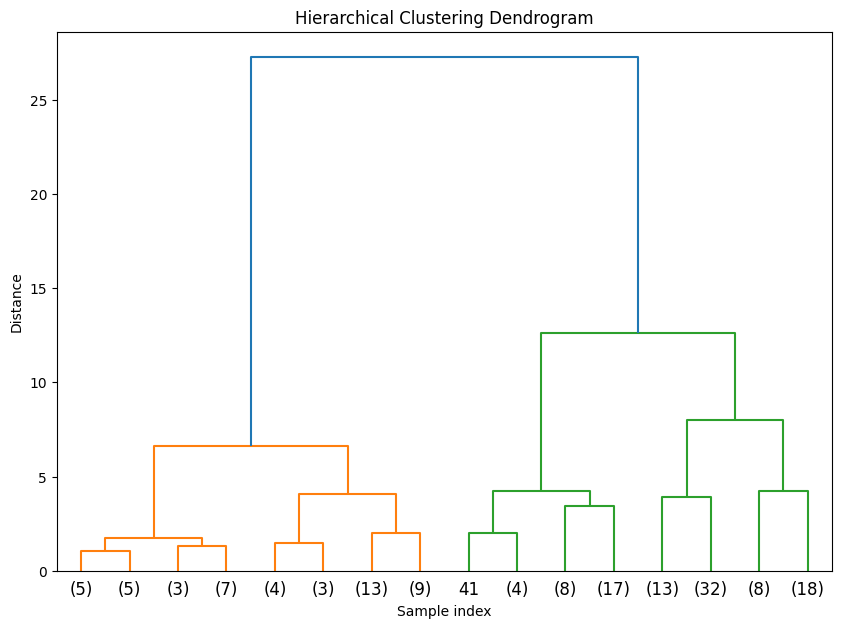

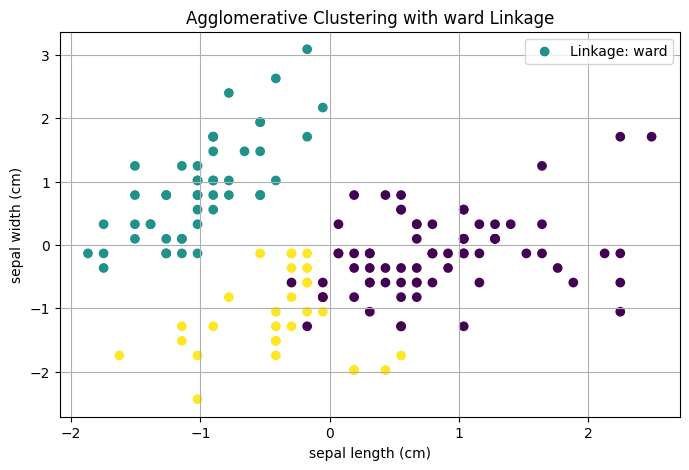

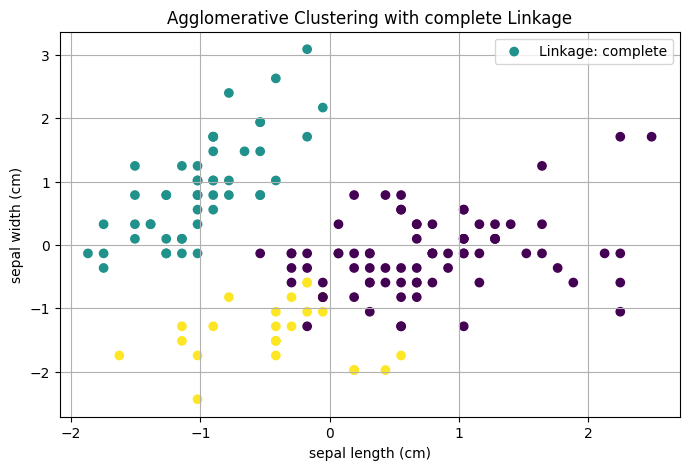

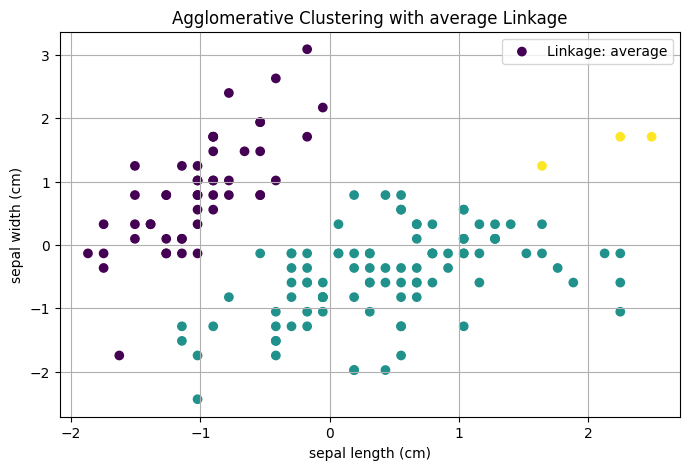

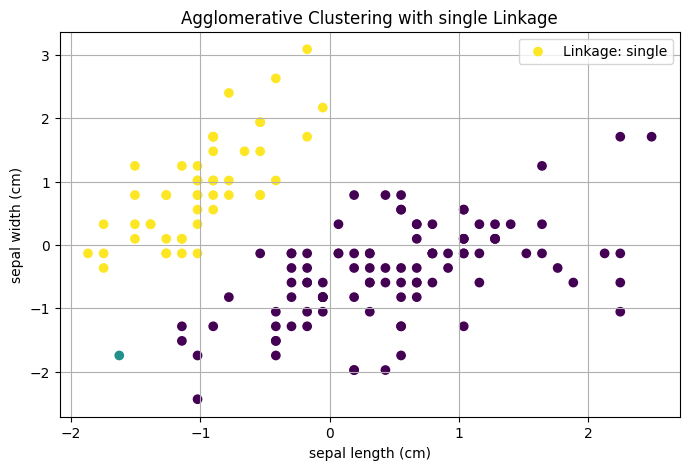

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering with different linkage criteria
linkages = ['ward', 'complete', 'average', 'single']
n_clusters = 3

for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = agglo.fit_predict(X_scaled)
    plt.figure(figsize=(8, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', label=f'Linkage: {linkage}')
    plt.title(f'Agglomerative Clustering with {linkage} Linkage')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#using DBSCAN

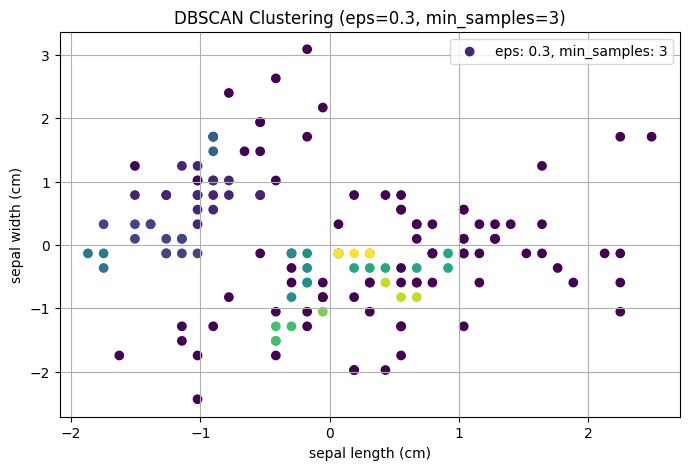

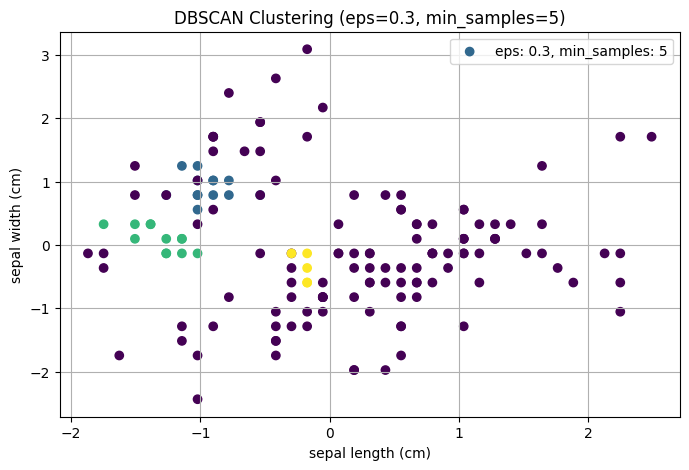

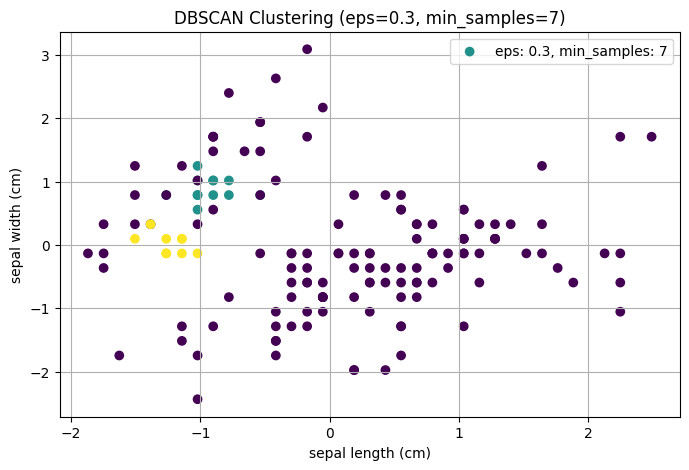

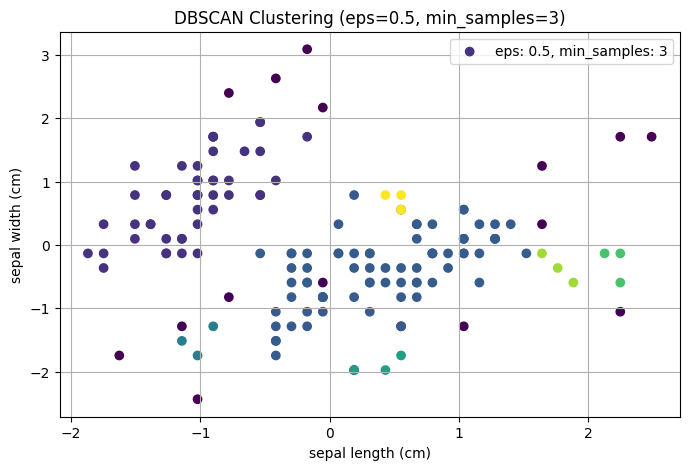

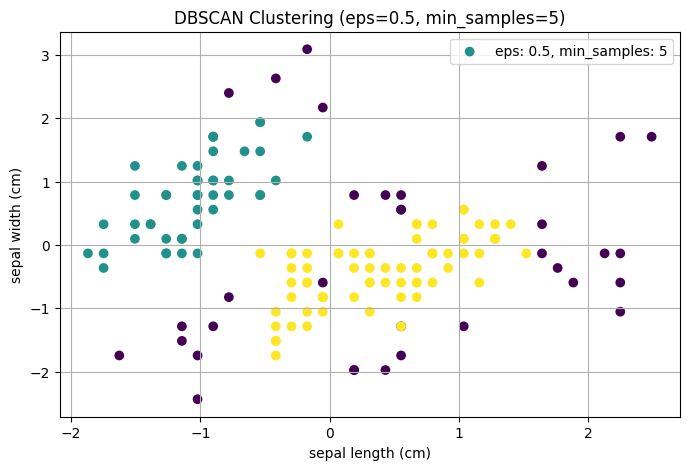

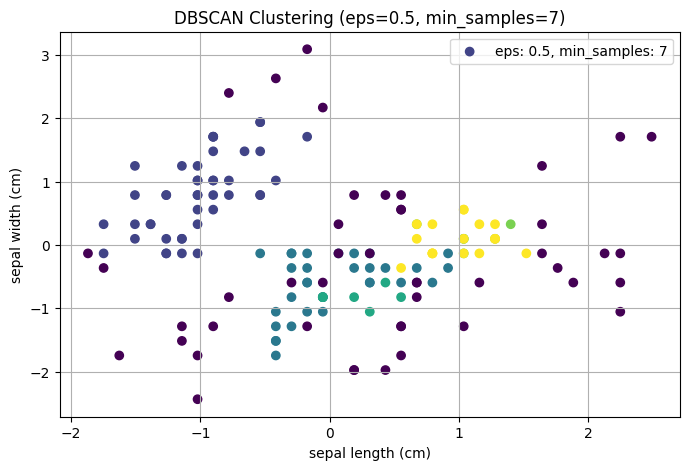

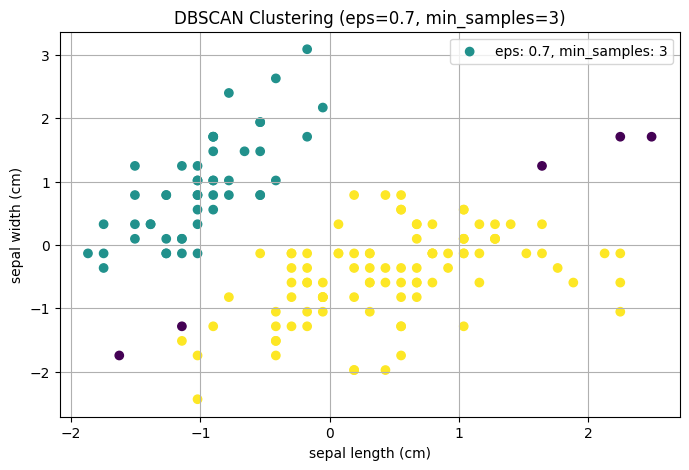

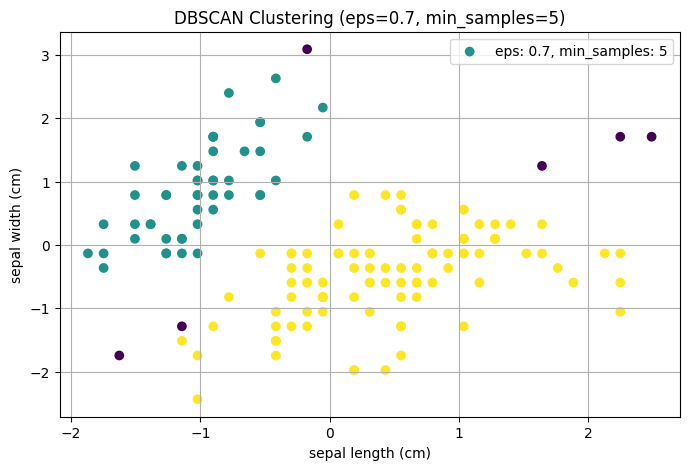

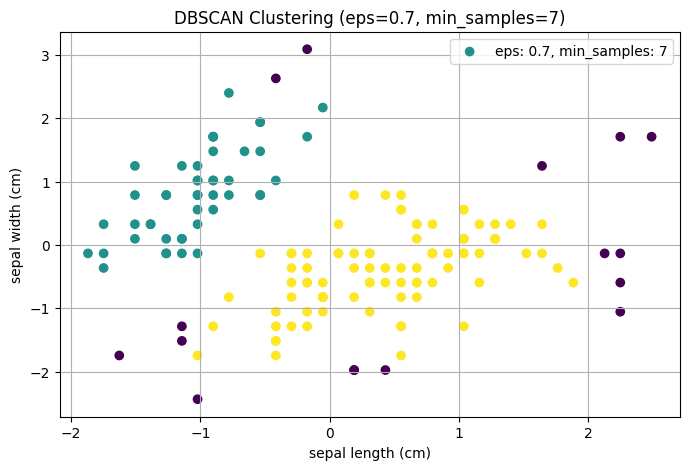

In [3]:
from sklearn.cluster import DBSCAN

# DBSCAN with different parameters
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        plt.figure(figsize=(8, 5))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', label=f'eps: {eps}, min_samples: {min_samples}')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.legend()
        plt.grid(True)
        plt.show()
